In [1]:
import numpy as np
from matplotlib import pyplot as plt
from specializeGraph import *
import warnings
warnings.filterwarnings('ignore')


In [2]:
def randomGraph(n,base=False,bSize=None):
    """
    Random Graph on n vertices with an optional 
    random base set of vertices
    """
    A = (np.random.rand(n,n)>np.random.rand())*1.
    for j in range(n): A[j,j] = 0
    nodes = list(range(n))
    if bSize is None:
        bSize = np.random.randint(1,high=n)
    base = list(np.random.choice(nodes,replace=False,size=bSize))
    
    return A,base

def getSpectrums(A,base):
    """
        Returns spectral radius of the laplacian
        before and after specialization over the base
        supplied
    """
    L = laplacian(A,randomWalk=0)
    rL = round(spectralRad(L),3)
    sA = specializeGraph(A,base)
    sL = laplacian(sA,randomWalk=0)
    SrL = round(spectralRad(sL),3)
    return rL,SrL

def lapInfo(A,base,randomWalk=False,outSp=False,draw=False):
    L = laplacian(A,randomWalk=randomWalk)
    rL = round(spectralRad(L),3)

    if outSp:
        sA = outSpecialize(A,base)
    else:
        sA = specializeGraph(A,base)
        
    sL = laplacian(sA,randomWalk=randomWalk)
    SrL = round(spectralRad(sL),3)

    if draw:
        drawGraph(A)
        print(base)
        drawGraph(sA)
    print("MAX IN-DEG: \n {}".format(max(A.sum(axis=1))))
    print("SPECIAL MAX IN-DEG: \n {}".format(max(sA.sum(axis=1))))
    print("SPECTRUM: \nrL: {}".format(rL) )
    print("SPECIAL SPECTRUM: \nSrL: {}".format(SrL) )
    print("\n")

### Change in spectral radius of laplacian after specialization

In [18]:
N = 10


for n in range(2,N):
    for i in range(n**4):
        A,base = randomGraph(n,base=True)
        sA = specializeGraph(A,base)
        rho = spectralRad(laplacian(A))
        rhoS = spectralRad(laplacian(sA))
          
        if rhoS-rho > maxChange[n]:
            maxChange[n] = rhoS-rho
        if rho > maxBefore[n]:
            maxBefore[n] = rho
        if rhoS > maxSpect[n]:
            maxSpect[n] = rhoS

print("n\t Max Radius\t Max Specialized Radius")
for n in range(2,N):
    print("{}\t {}\t\t {}".format(n,round(maxBefore[n],3),round(maxSpect[n],3)))
    
print("\nn\t Max Change")
for n in range(2,N):
    print("{}\t {}".format(n,round(maxChange[n],3)))

/Users/sgiddens/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/Users/sgiddens/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/Users/sgiddens/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


n	 Max Radius	 Max Specialized Radius
2	 2.0		 2.0
3	 3.0		 4.618
4	 4.0		 10.0
5	 5.0		 20.0
6	 6.0		 36.187
7	 7.0		 59.048
8	 8.0		 79.07
9	 9.0		 111.0

n	 Max Change
2	 0.0
3	 1.618
4	 6.0
5	 15.0
6	 30.187
7	 53.048
8	 73.388
9	 102.0


### Graphs that preseve spectral radius

/Library/Python/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: ComplexWarning: Casting complex values to real discards the imaginary part


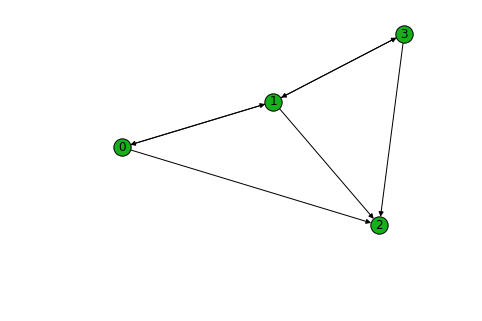

[0, 2, 1]


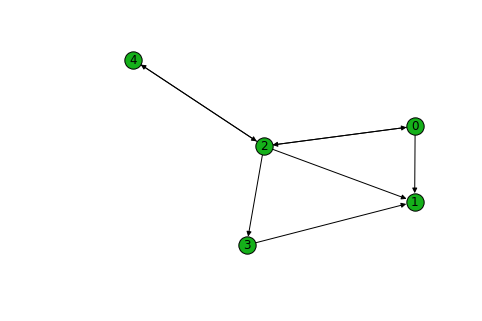

L: 
[[ 1. -1.  0.  0.]
 [-1.  2.  0. -1.]
 [-1. -1.  3. -1.]
 [ 0. -1.  0.  1.]]
sL: 
[[ 1.  0. -1.  0.  0.]
 [-1.  3. -1. -1.  0.]
 [-1.  0.  2.  0. -1.]
 [ 0.  0. -1.  1.  0.]
 [ 0.  0. -1.  0.  1.]]
SPECTRUM: 
rL: 3.0
SPECIAL SPECTRUM: 
SrL: 3.0




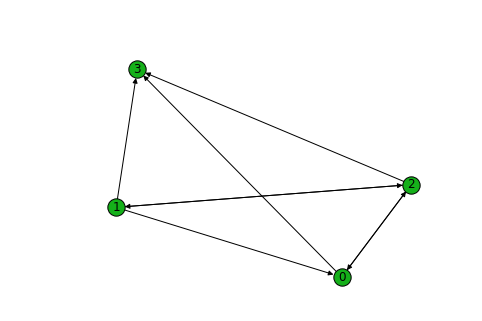

[0]


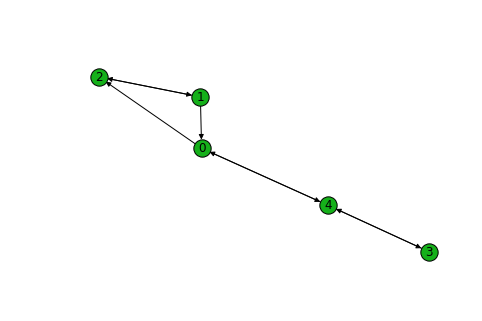

L: 
[[ 2. -1. -1.  0.]
 [ 0.  1. -1.  0.]
 [-1. -1.  2.  0.]
 [-1. -1. -1.  3.]]
sL: 
[[ 2. -1.  0.  0. -1.]
 [ 0.  1. -1.  0.  0.]
 [-1. -1.  2.  0.  0.]
 [ 0.  0.  0.  1. -1.]
 [-1.  0.  0. -1.  2.]]
SPECTRUM: 
rL: 3.0
SPECIAL SPECTRUM: 
SrL: 3.0




In [4]:
n = 4
for i in range(20):
    A = (np.random.rand(n,n)>np.random.rand())*1.
    for j in range(n): A[j,j] = 0
    nodes = list(range(n))
    base = list(np.random.choice(nodes,replace=False,size=np.random.randint(1,high=n)))
    L = laplacian(A,randomWalk=0)
    rL = round(spectralRad(L),3)

    
    sA = specializeGraph(A,base)
    sL = laplacian(sA,randomWalk=0)
    SrL = round(spectralRad(sL),3)
    if SrL == rL and sA.shape[0] > A.shape[0]:
        drawGraph(A)
        print(base)
        drawGraph(sA)
        print("L: ")
        print(L)
        print("sL: ")
        print(sL)
        print("SPECTRUM: \nrL: {}".format(rL) )
        print("SPECIAL SPECTRUM: \nSrL: {}".format(SrL) )
        print("\n")

### Compute Desnity of graphs that preserve spectrum

In [3]:
print("Density of Graphs that Preserve Spectrum as n increases")
print("n\t Preserve \t Incr \t Decr")
for n in range(3,10):
    incr = 0
    decr = 0
    preserve = 0
    for i in range(10*n**3):
        A,base = randomGraph(n)
        rL,SrL = getSpectrums(A,base)
        rL = np.round(rL,6)
        SrL = np.round(SrL,6)
        
        if rL < SrL:
            incr += 1
        if rL == SrL:
            preserve += 1
        if rL > SrL:
            decr += 1
    perPre = round(float(preserve)/(10.*n**3),4)
    perIncr = round(float(incr)/(10.*n**3),4)
    perDecr = round(float(decr)/(10.*n**3),4)

    print("{}\t{}\t\t{}\t{}".format(n,perPre,perIncr,perDecr))  

Density of Graphs that Preserve Spectrum as n increases
n	 Preserve 	 Incr 	 Decr
3	0.5037		0.1815	0.3148
4	0.3469		0.4156	0.2375
5	0.2216		0.524	0.2544
6	0.1708		0.6398	0.1894
7	0.1356		0.7055	0.1589
8	0.1125		0.7404	0.1471
9	0.0947		0.7775	0.1278
